In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\govin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
# Now I'm loading the IMDb dataset from my working directory
df = pd.read_csv("IMDB Dataset.csv")

# Just checking the first few rows to make sure it loaded correctly
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# I'm setting up the stopword list and stemmer to clean the text later
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Here's my custom function to clean and simplify the reviews
def preprocess(text):
    text = re.sub('<.*?>', ' ', text)  # I'm removing any HTML tags like <br />
    text = re.sub('[^a-zA-Z]', ' ', text)  # I'm keeping only letters, removing numbers and symbols
    text = text.lower().split()  # I convert everything to lowercase and split into words
    text = [stemmer.stem(word) for word in text if word not in stop_words]  # I remove stopwords and stem the words
    return ' '.join(text)

# I apply the cleaning function to all reviews in the dataset
df['cleaned_review'] = df['review'].apply(preprocess)


In [6]:
# Now I convert the cleaned text into numerical form using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_review'])


In [8]:
# I apply K-Means clustering to group the reviews into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # Set n_init explicitly to remove the warning
kmeans.fit(X)

# I assign the resulting cluster labels back to the original dataset
df['cluster'] = kmeans.labels_


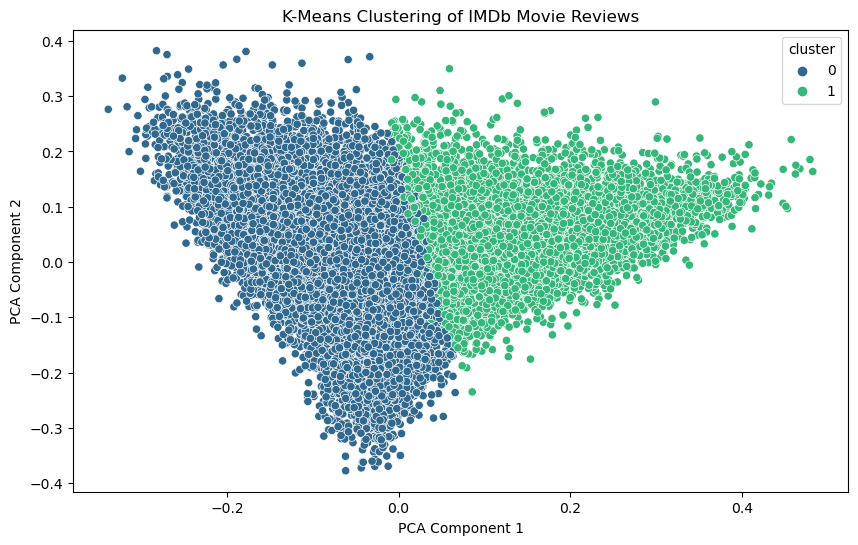

In [9]:
# I reduce the TF-IDF features to 2 components using PCA so I can plot them
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Now I visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis')
plt.title("K-Means Clustering of IMDb Movie Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [10]:
# Just out of curiosity, I map sentiments to 0/1 and check how the clusters match the actual sentiments
df['sentiment_num'] = df['sentiment'].map({'positive': 1, 'negative': 0})
pd.crosstab(df['cluster'], df['sentiment_num'])


sentiment_num,0,1
cluster,,
0,14728,18304
1,10272,6696


**Key Steps & Observations:**
* Text Preprocessing
I cleaned the review data by removing HTML tags, special characters, and stopwords. 
I also applied stemming to reduce words to their base forms, which made the text more uniform for analysis.

* Feature Engineering with TF-IDF
I transformed the cleaned text into numerical form using TF-IDF vectorization. 
This helped in capturing the importance of words across all reviews while reducing noise from common or irrelevant terms.

* Unsupervised Clustering with K-Means
I applied K-Means clustering with 2 clusters to group similar reviews. 
This was done without using sentiment labels, purely based on the content of the text.

* Cluster Visualization
Using PCA for dimensionality reduction, I visualized the clustered reviews in 2D. 
The resulting plot showed two distinct clusters, indicating that the reviews naturally split into groups, likely aligned with sentiment (positive vs negative).

* Insights

The separation between the clusters was visually clear, suggesting that the language used in positive and negative reviews differs significantly.

Even without using the actual sentiment labels, K-Means was able to form coherent groups — which shows the power of unsupervised learning in text analysis.

This clustering can be useful in exploratory data analysis or when labels are unavailable.

